In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


# LINEAR REGRESSION:

In [2]:
df = pd.read_csv('column_2C_weka.csv')


In [3]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


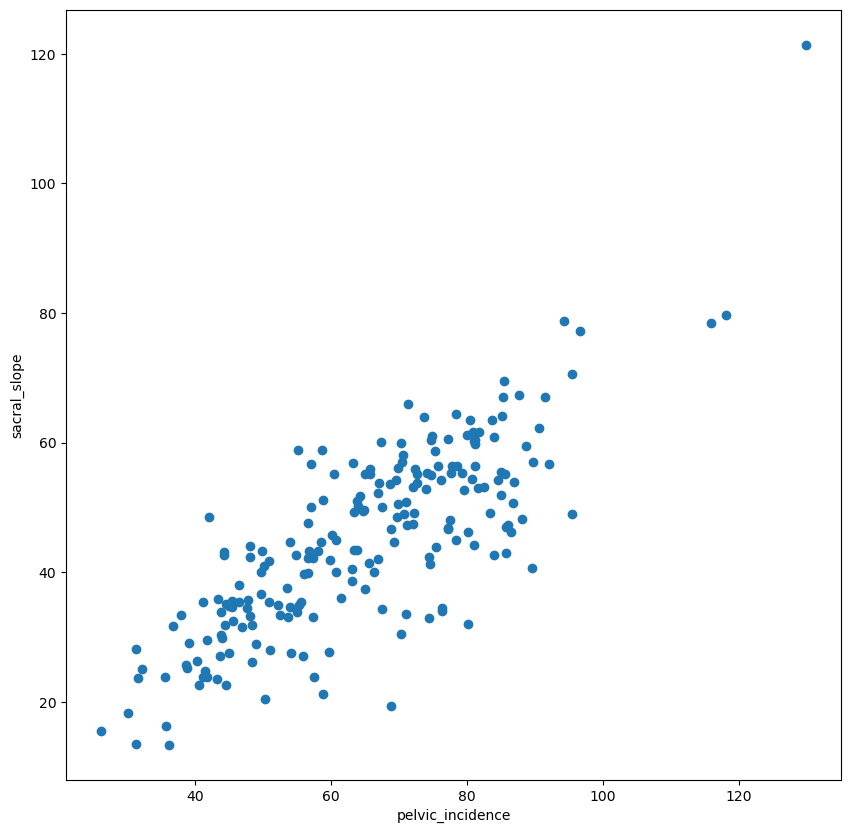

In [4]:
data1 = df[df['class'] =='Abnormal']
x = np.array(data1.loc[:,'pelvic_incidence']).reshape(-1,1)  #feature
y = np.array(data1.loc[:,'sacral_slope']).reshape(-1,1)     #target
# Scatter
plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

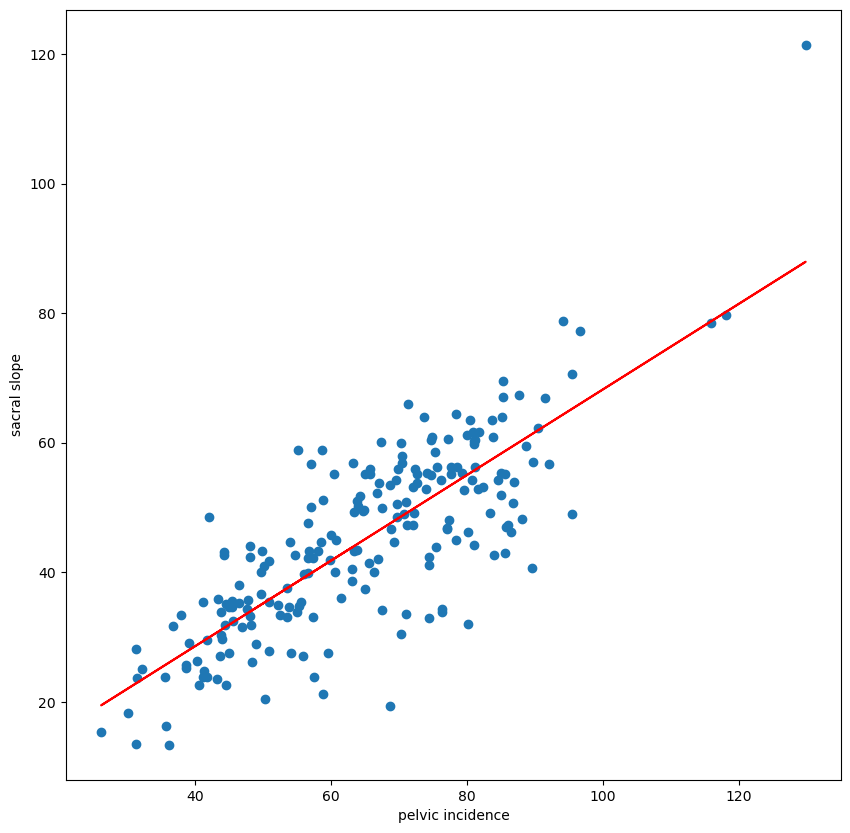

In [5]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(x,y)
y_head=linear_reg.predict(x)
#%% # Plot regression line and scatter
plt.figure(figsize=[10,10])
plt.scatter(x,y)
plt.xlabel("pelvic incidence")
plt.ylabel("sacral slope")
plt.plot(x,y_head,color="red")
plt.show()

In [6]:
# prediction
b0=linear_reg.predict([[0]])
b1=linear_reg.coef_
print("b0: ",b0)
print("b1: ",b1)
print("Predict: ",b1*80+b0)

b0:  [[2.17390961]]
b1:  [[0.66047069]]
Predict:  [[55.01156469]]


In [7]:
#R^2 Score
print('R^2 score: ',linear_reg.score(x, y))

R^2 score:  0.6458410481075871


# Multiple Linear Regression


b3:  [4.4225601e-10]
b0,b1,b2,b4,b5: [[ 1.00000000e+00 -1.00000000e+00 -1.88672112e-11 -6.21875266e-12
   5.31292186e-12]]


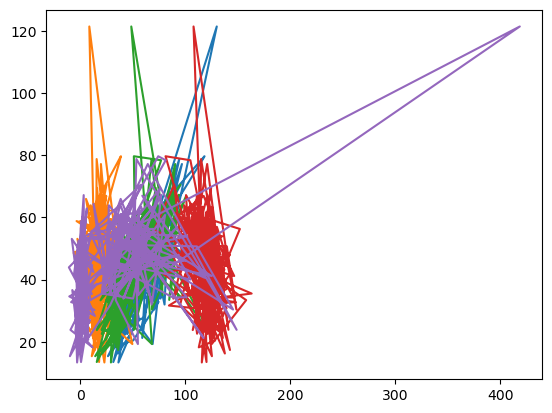

In [8]:
x = df.iloc[:,[0,1,2,4,5]].values
y = df.sacral_slope.values.reshape(-1,1)
multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(x,y)
print("b3: ", multiple_linear_regression.intercept_)
print("b0,b1,b2,b4,b5:", multiple_linear_regression.coef_)
plt.plot(x,y,label = "poly")


In [9]:
y_head = multiple_linear_regression.predict(x)

from sklearn.metrics import r2_score
print("R^2 : ",r2_score(y,y_head))

R^2 :  1.0


# POLYNOMIAL LINEAR REGRESSION: 

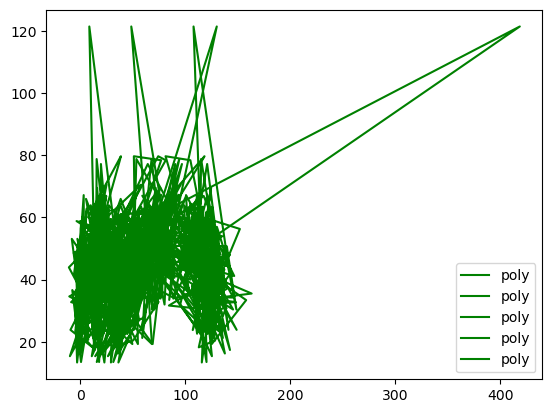

In [10]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = PolynomialFeatures(degree = 4)

x_polynomial = polynomial_regression.fit_transform(x)
# %% fit
linear_regression2 = LinearRegression()
linear_regression2.fit(x_polynomial,y)

# %%

y_head2 = linear_regression2.predict(x_polynomial)

plt.plot(x,y_head2,color= "green",label = "poly")
plt.legend()
plt.show()


In [11]:
#%% R^2 score
from sklearn.metrics import r2_score
print("R^2 : ",r2_score(y,y_head2))

R^2 :  0.9999999999999857


# Random Forest Regression:

C:\Users\serdi\AppData\Local\Temp\ipykernel_21140\92703857.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_reg.fit(x,y)


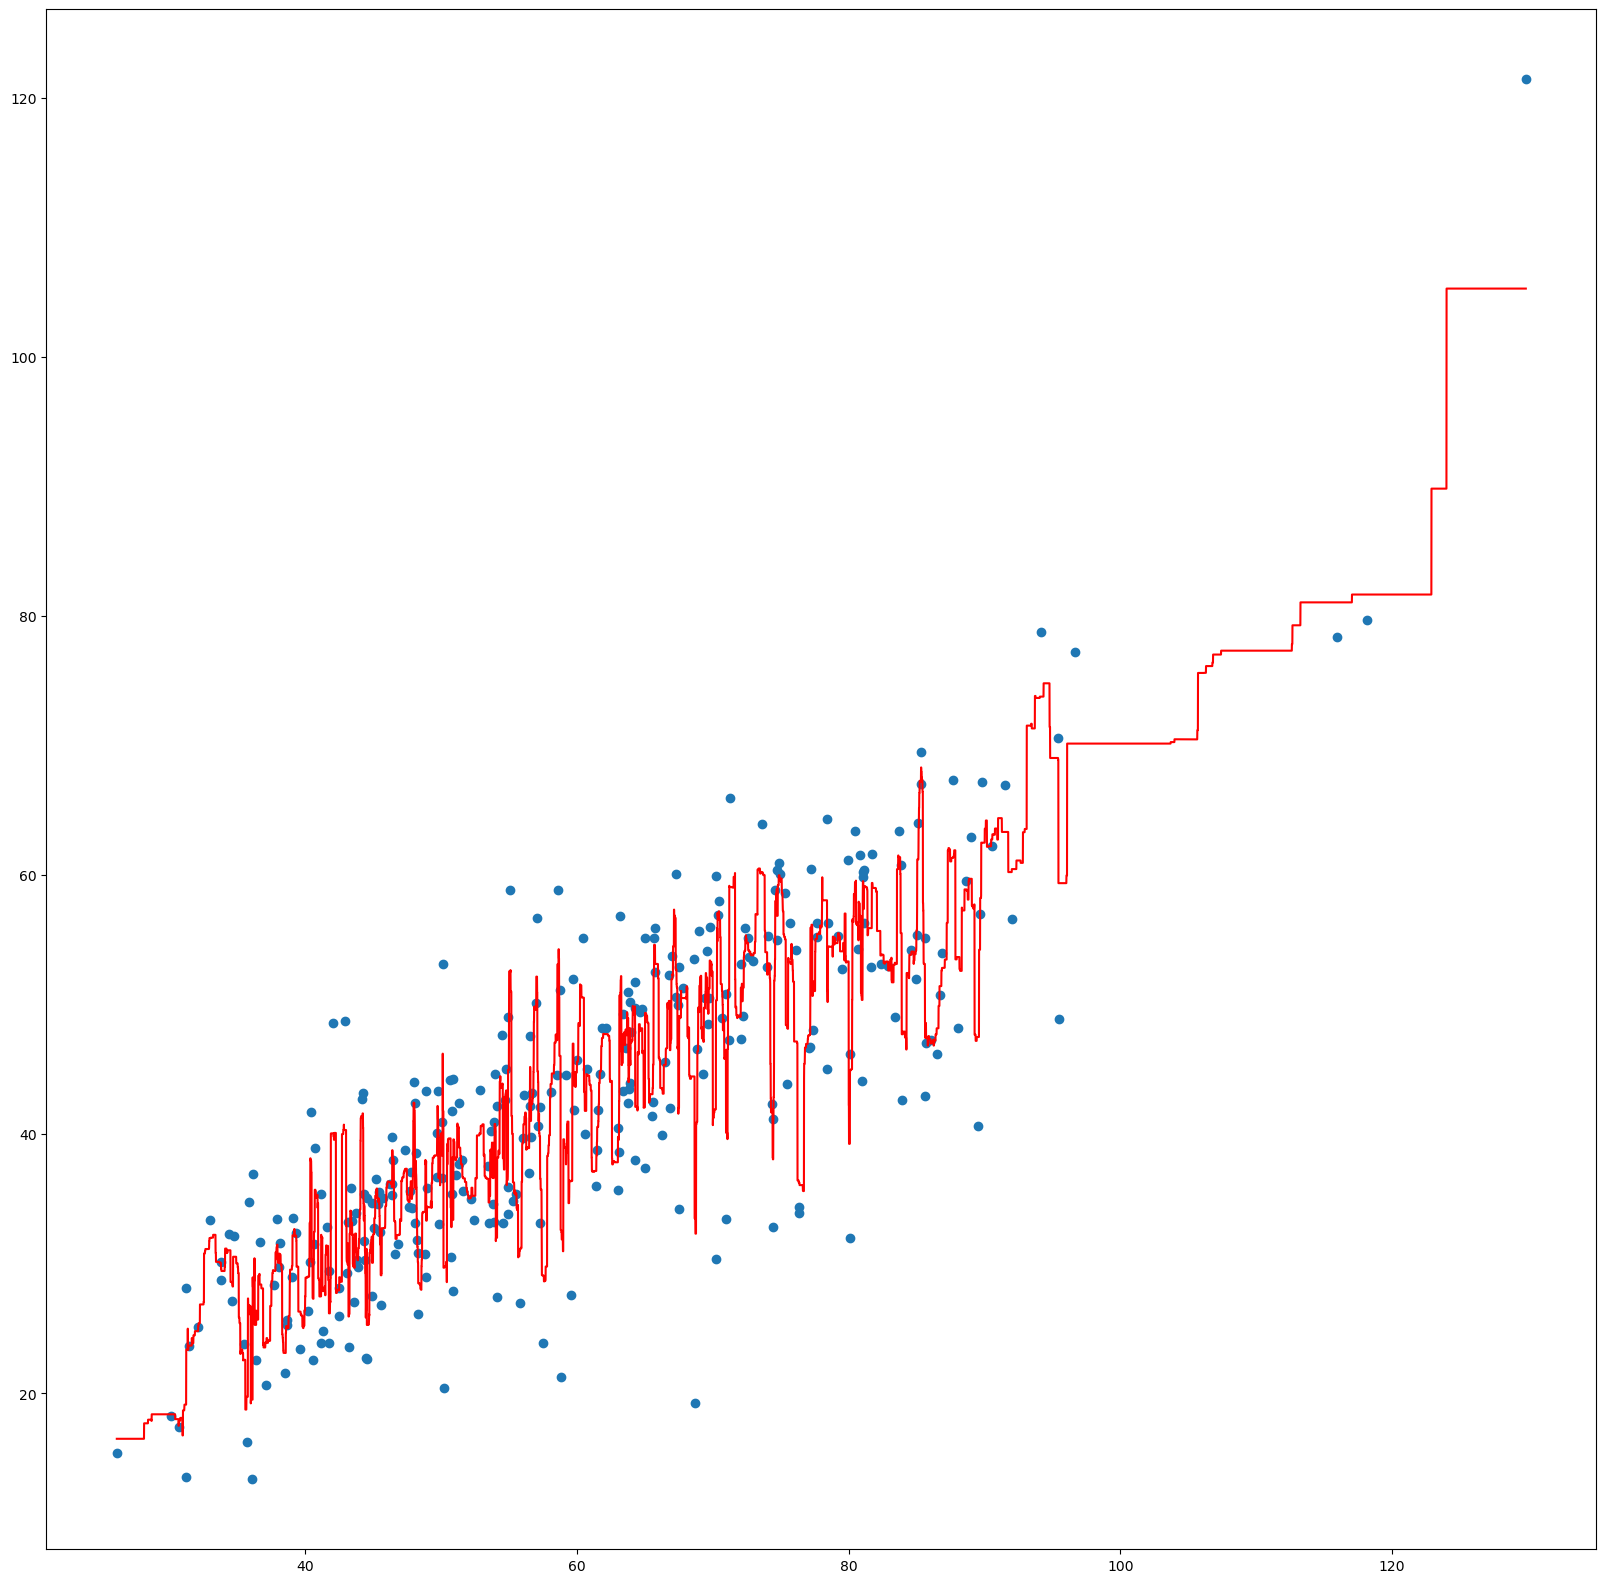

In [12]:
x=df.pelvic_incidence.values.reshape(-1,1)
y=df.sacral_slope.values.reshape(-1,1)
plt.figure(figsize=[20,20])
plt.scatter(x,y)

from sklearn.ensemble import RandomForestRegressor

random_reg=RandomForestRegressor(n_estimators=100,random_state=42)

random_reg.fit(x,y)

x_=np.arange(min(x),max(x),0.01).reshape(-1,1)
y_head=random_reg.predict(x_)
plt.plot(x_,y_head,color="red")
plt.show()